Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


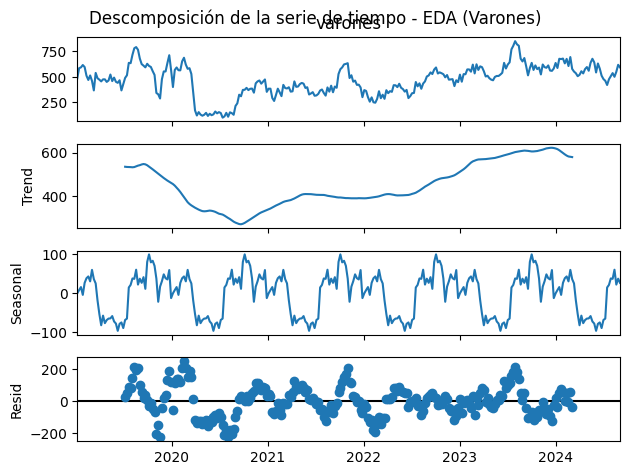

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - loss: 0.2563
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1927
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1320
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0551
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0271
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0296
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0236
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0245
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0220
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0220
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0201
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0204
Epoch 13/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0196
Epoch 14/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0181
Epoch 15/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0198
Epoch 16/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s

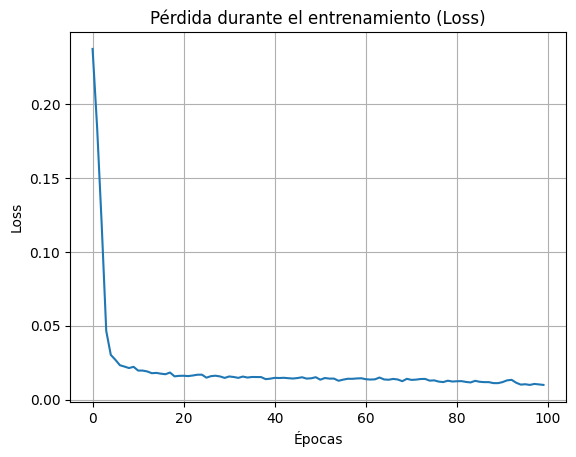

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
MAE en el conjunto de prueba: 45.53
RMSE en el conjunto de prueba: 54.71
MAPE en el conjunto de prueba: 7.77%
sMAPE en el conjunto de prueba: 8.00%


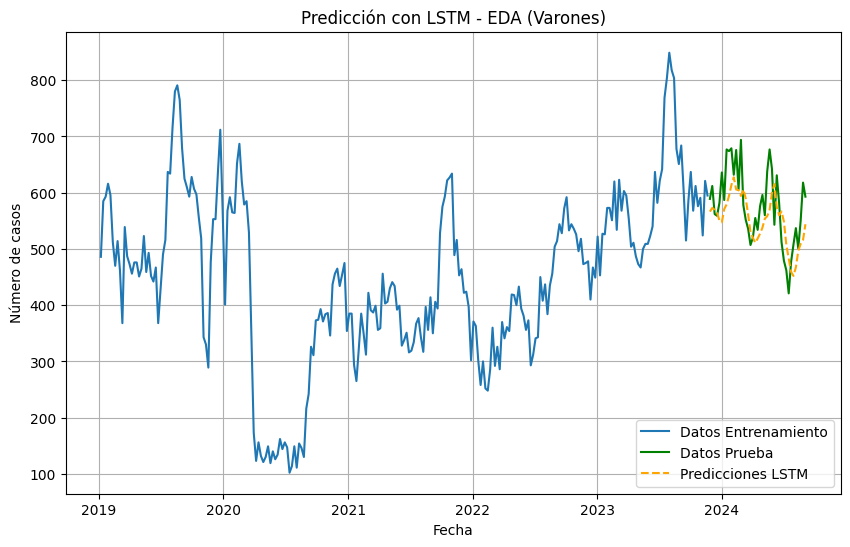

        Fecha  Reales   Predichos
0  2023-11-27   589.0  566.410278
1  2023-12-04   612.0  572.985718
2  2023-12-11   562.0  569.551758
3  2023-12-18   559.0  564.211121
4  2023-12-25   582.0  550.516479
5  2024-01-01   636.0  547.469299
6  2024-01-08   587.0  570.822571
7  2024-01-15   677.0  579.200623
8  2024-01-22   674.0  594.426758
9  2024-01-29   679.0  613.514526
10 2024-02-05   632.0  627.407959
11 2024-02-12   676.0  605.808838
12 2024-02-19   606.0  604.596558
13 2024-02-26   694.0  594.308167
14 2024-03-04   578.0  605.864502
15 2024-03-11   552.0  590.062866
16 2024-03-18   536.0  561.496094
17 2024-03-25   507.0  529.898926
18 2024-04-01   520.0  520.010620
19 2024-04-08   555.0  510.979187
20 2024-04-15   534.0  518.499939
21 2024-04-22   576.0  527.232544
22 2024-04-29   596.0  537.939331
23 2024-05-06   560.0  553.783691
24 2024-05-13   638.0  558.337158
25 2024-05-20   677.0  569.358826
26 2024-05-27   642.0  600.159851
27 2024-06-03   543.0  615.226135
28 2024-06-10 

In [ ]:
# Importar librerías necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

# Cargar el dataset y filtrar por "EDA" y la columna "varones"
from google.colab import drive
drive.mount('/content/drive')

data = pd.read_csv("/content/drive/My Drive/MODELOS MONOGRAFIA/otrasinfeccionesMonografia.csv", sep=";")
data_eda_varones = data[data['tipo'] == 'EDA'][['fecha', 'varones']]
data_eda_varones['fecha'] = pd.to_datetime(data_eda_varones['fecha'], dayfirst=True)
data_eda_varones = data_eda_varones.sort_values(by='fecha')
data_eda_varones.set_index('fecha', inplace=True)

# Sección 1: Descomposición de la serie de tiempo

result = seasonal_decompose(data_eda_varones['varones'], model='additive', period=52)  # Usando una periodicidad anual (52 semanas)
result.plot()
plt.suptitle("Descomposición de la serie de tiempo - EDA (Varones)")
plt.show()

# Sección 2: Preprocesamiento de datos
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data_eda_varones)

# Crear secuencias de datos
def create_sequences(data, time_steps=1):
    x, y = [], []
    for i in range(len(data) - time_steps):
        x.append(data[i:(i + time_steps), 0])
        y.append(data[i + time_steps, 0])
    return np.array(x), np.array(y)

# Dividir los datos en entrenamiento (85%) y prueba (15%)
train_size = int(len(data_scaled) * 0.85)
train, test = data_scaled[:train_size], data_scaled[train_size:]

# Crear secuencias para entrenamiento y prueba
time_steps = 4
x_train, y_train = create_sequences(train, time_steps)
x_test, y_test = create_sequences(test, time_steps)

# Cambiar la forma de los datos para que sean compatibles con LSTM (samples, time_steps, features)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Sección 3: Construir el modelo LSTM
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(time_steps, 1)))
model.add(Dropout(0.3))
model.add(LSTM(units=25, return_sequences=True))
model.add(Dropout(0.3))
#model.add(LSTM(units=20, return_sequences=True))
#model.add(Dropout(0.3))
#model.add(LSTM(units=10, return_sequences=True))
#model.add(Dropout(0.3))
model.add(LSTM(units=10))
#model.add(Dropout(0.3))
model.add(Dense(1))

# Compilar el modelo
model.compile(optimizer='adam', loss='mean_squared_error')

# Sección 4: Entrenar el modelo y graficar la pérdida (loss)
history = model.fit(x_train, y_train, epochs=100, batch_size=32, verbose=1)

# Graficar el loss del entrenamiento
plt.plot(history.history['loss'])
plt.title('Pérdida durante el entrenamiento (Loss)')
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

# Sección 5: Realizar predicciones y desescalar
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
y_train = scaler.inverse_transform([y_train])
y_test = scaler.inverse_transform([y_test])

# Sección 6: Evaluación de métricas MAE y sMAPE
# Calcular las métricas MAE, RMSE, MAPE y sMAPE
mae_test = mean_absolute_error(y_test[0], test_predict[:, 0])
rmse_test = np.sqrt(mean_squared_error(y_test[0], test_predict[:, 0]))
mape_test = mean_absolute_percentage_error(y_test[0], test_predict[:, 0]) * 100  # Convertir a porcentaje
smape_test = 100 * np.mean(2 * np.abs(y_test[0] - test_predict[:, 0]) / (np.abs(y_test[0]) + np.abs(test_predict[:, 0])))

# Imprimir las métricas de evaluación
print(f'MAE en el conjunto de prueba: {mae_test:.2f}')
print(f'RMSE en el conjunto de prueba: {rmse_test:.2f}')
print(f'MAPE en el conjunto de prueba: {mape_test:.2f}%')
print(f'sMAPE en el conjunto de prueba: {smape_test:.2f}%')

# Sección 7: Graficar predicciones vs datos reales
plt.figure(figsize=(10, 6))
plt.plot(data_eda_varones.index[:train_size + time_steps], scaler.inverse_transform(data_scaled[:train_size + time_steps]), label='Datos Entrenamiento')
plt.plot(data_eda_varones.index[train_size + time_steps:], scaler.inverse_transform(data_scaled[train_size + time_steps:]), label='Datos Prueba', color='green')
plt.plot(data_eda_varones.index[train_size + time_steps:], test_predict, label='Predicciones LSTM', linestyle='--', color='orange')
plt.title(f'Predicción con LSTM - EDA (Varones)')
plt.xlabel('Fecha')
plt.ylabel('Número de casos')
plt.legend()
plt.grid(True)
plt.show()

# Comparación de los valores reales vs predicciones
comparison_df = pd.DataFrame({
    'Fecha': data_eda_varones.index[train_size + time_steps:],
    'Reales': y_test[0],
    'Predichos': test_predict[:, 0]
})

# Mostrar el dataframe comparativo
print(comparison_df)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
       Fecha  Predicciones
0 2024-09-09    569.827148
1 2024-09-16    565.981018
2 2024-09-23    550.853333
3 2024-09-30    543.591248
4 2024-10-07    536.783875
5 2024-10-14    530.170959
6 2024-10-21    525.063843
7 2024-10-28    520.289551


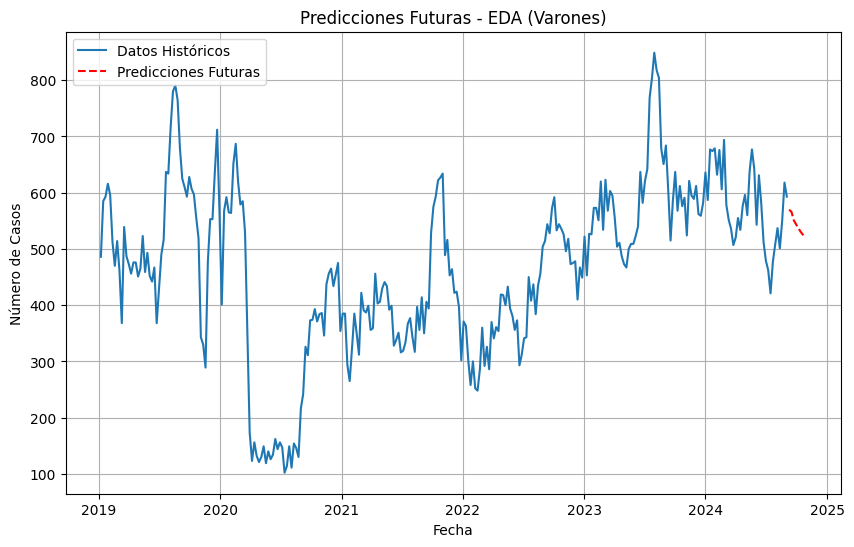

In [ ]:
# prompt: realiza 8 predicciones a futuro

# Sección 8: Predicciones a futuro

# Preparar los datos para la predicción
future_predictions = []
last_data_points = data_scaled[-time_steps:]

for i in range(8):
    x_future = np.reshape(last_data_points, (1, time_steps, 1))
    future_prediction = model.predict(x_future)
    future_predictions.append(future_prediction[0,0])
    last_data_points = np.append(last_data_points[1:], future_prediction, axis=0)

# Desescalar las predicciones
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

# Generar fechas futuras
last_date = data_eda_varones.index[-1]
future_dates = [last_date + pd.DateOffset(weeks=i+1) for i in range(8)]

# Crear un DataFrame para las predicciones futuras
future_df = pd.DataFrame({'Fecha': future_dates, 'Predicciones': future_predictions.flatten()})

# Imprimir el DataFrame de predicciones futuras
print(future_df)

# Graficar las predicciones futuras
plt.figure(figsize=(10, 6))
plt.plot(data_eda_varones.index, scaler.inverse_transform(data_scaled), label='Datos Históricos')
plt.plot(future_df['Fecha'], future_df['Predicciones'], label='Predicciones Futuras', linestyle='--', color='red')
plt.title(f'Predicciones Futuras - EDA (Varones)')
plt.xlabel('Fecha')
plt.ylabel('Número de Casos')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Valores reales a futuro
real_values = np.array([617, 687, 666, 629, 580, 517, 523, 498])

# Suponiendo que 'future_df' contiene las predicciones del modelo
# Reemplaza esto con tu DataFrame real
# Ejemplo de future_df (reemplázalo con tu DataFrame real)
future_df = pd.DataFrame({
    'Predicciones': [570,566,551,544,537,530,525,520] #Reemplazar con los valores de tu prediccion
})

# Calcular las métricas
mae = np.mean(np.abs(real_values - future_df['Predicciones']))
rmse = np.sqrt(np.mean((real_values - future_df['Predicciones'])**2))
mape = np.mean(np.abs((real_values - future_df['Predicciones']) / real_values)) * 100
smape = 100/len(real_values) * np.sum(2 * np.abs(future_df['Predicciones'] - real_values) / (np.abs(real_values) + np.abs(future_df['Predicciones'])))


print(f'MAE: {mae:.2f}')
print(f'RMSE: {rmse:.2f}')
print(f'MAPE: {mape:.2f}%')
print(f'sMAPE: {smape:.2f}%')

# Crear un DataFrame para comparar visualmente
comparison_df = pd.DataFrame({
    'Real': real_values,
    'Predicho': future_df['Predicciones']
})
comparison_df

MAE: 56.00
RMSE: 70.54
MAPE: 8.84%
sMAPE: 9.44%


,Real,Predicho
0,617,570
1,687,566
2,666,551
3,629,544
4,580,537
5,517,530
6,523,525
7,498,520


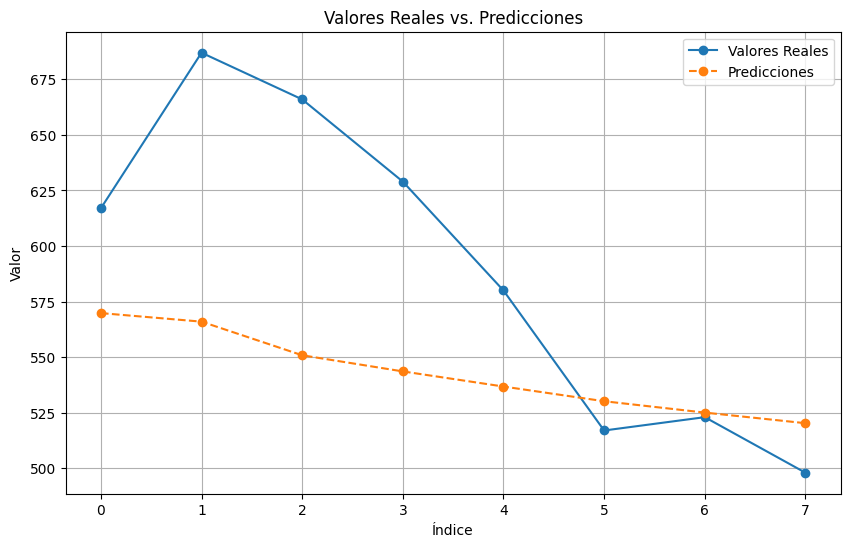

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(real_values, label='Valores Reales', marker = 'o')
plt.plot(future_predictions, label='Predicciones', linestyle='--', marker = 'o')
plt.xlabel('Índice')
plt.ylabel('Valor')
plt.title('Valores Reales vs. Predicciones')
plt.legend()
plt.grid(True)
plt.show()